Zbudować autoenkoder wykorzystując zbiór CIFAR10

Podzielić zbiór na ciąg trenujący i uczący w proporcjach: 50000, 10000 (domyślne wartości w przypadku wykorzystania funkcji bibliotecznej  z pakietu tensorflow.keras.datasets.cifar10.load_data()

Zwizualizować 10-25 przykładów ze zbioru

Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)

warstwa kodująca powinna składać się z 512 neuronów.

baseline: dwie wartswy gęste + kodująca (2048,1024, 512 neuronów), funkcje aktywacji ReLU, wyjście z ostatniej warstwy sigmoid.

funkcja straty: błąd średniokowadratowy, optimizer SGD

liczba epok uczenia: 100, batch_size= 1024

Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)

Skomentować przebieg procesu uczenia na podstawie metryk na zbiorze uczącym i
testowym w kolejnych epokach uczenia (można zwizualizować). Czy nastąpił overfitting / underfitting ?

Zwizualizować 10-25 przykładów  obraz wejściowy - rekonstrukcja

Zbudować prosty klasyfikator wykorzystujący:

 warstwę enkodującą do transformacji wejścia do wektora o rozmiarze 512 (ta warstwa nie będzie zmieniana podczas uczenia)

dwie warstwy gęste: ostatnia z funkcją aktywacji softmax

optimizer SGD, funkcja straty: CategoricalCrossentropy

Zbadać metrykę accuracy na zbiorze testowym  (ile obrazów zostało poprawnie


zaklasyfikowanych)

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, utils, optimizers
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# 1. Podzielić zbiór na ciąg trenujący i uczący w proporcjach: 50000, 10000
# (domyślne wartości w przypadku wykorzystania funkcji bibliotecznej z pakietu
# tensorflow.keras.datasets.cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


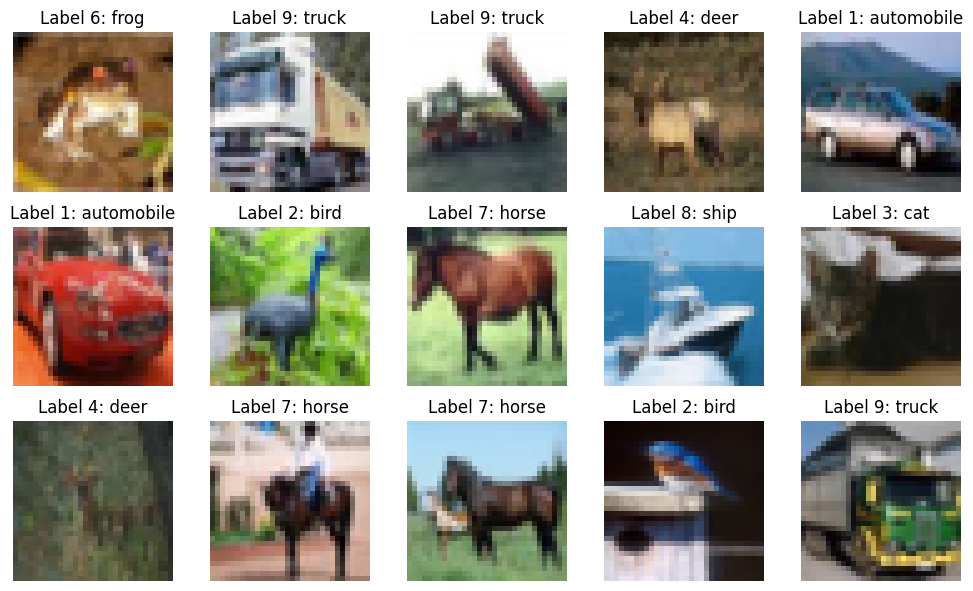

In [3]:
# 2. Zwizualizować 10-25 przykładów ze zbioru

images_to_print = 15

ordered_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(int(images_to_print / 5), 5, figsize=(10, 2 * (images_to_print / 5)))
axes = axes.ravel()

for i in range(images_to_print):
    axes[i].imshow(train_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Label {train_labels[i][0]}: {ordered_labels[train_labels[i][0]]}")

plt.tight_layout()
plt.show()

In [4]:
# 3. Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)
# - warstwa kodująca powinna składać się z 512 neuronów.
# - baseline: dwie wartswy gęste + kodująca (2048,1024, 512 neuronów), funkcje aktywacji ReLU, wyjście z ostatniej warstwy sigmoid.
# - funkcja straty: błąd średniokowadratowy, optimizer SGD
# - liczba epok uczenia: 100, batch_size= 1024
# - Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)

# VX - stara wersja ze spłaszczaniem poza definicją encodera i i decodera

# Normalizacja obrazow
# train_images = train_images.astype('float32') / 255.0  # VX
# test_images = test_images.astype('float32') / 255.0  # VX
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Splaszczanie obrazow dla warstwy Dense
# train_images_flat = train_images.reshape(-1, 32 * 32 * 3)  # VX
# test_images_flat = test_images.reshape(-1, 32 * 32 * 3)  # VX
# input_dim = train_images_flat.shape[1]  # VX

# Model encodera
encoder = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),  # , input_shape=(input_dim,)  # VX
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
])

# Model decodera
decoder = models.Sequential([
    layers.Input(shape=(512,)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2048, activation='relu'),
    layers.Dense(32 * 32 * 3, activation='sigmoid'),
    layers.Reshape((32, 32, 3))  # bez reshape  # VX
])

# Definicja tensora dla wejścia
# input_tensor = keras.Input(shape=(32, 32, 3))

# Utworzenie autoencodera
# encoded = encoder(input_tensor)
# decoded = decoder(encoded)
autoencoder = keras.models.Sequential([encoder, decoder])

# Uruchomienie modelu autoencodera
autoencoder.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=1.5))

# Uruchomienie uczenia autoenkodera
history = autoencoder.fit(
    train_images_normalized,  # train_images_flat,  # VX
    train_images_normalized,  # train_images_flat,  # VX
    epochs=100,
    batch_size=1024,
    validation_data=(test_images_normalized, test_images_normalized), # (test_images_flat, test_images_flat),  # VX
)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0640 - val_loss: 0.0635
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0639 - val_loss: 0.0632
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0634 - val_loss: 0.0627
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0630 - val_loss: 0.0617
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0616 - val_loss: 0.0598
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0595 - val_loss: 0.0575
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0574 - val_loss: 0.0558
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0556 - val_loss: 0.0543
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0542 - val_loss: 0.0525
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0524 - val_loss: 0.0502
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0501 - val_loss: 0.0488
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/ste

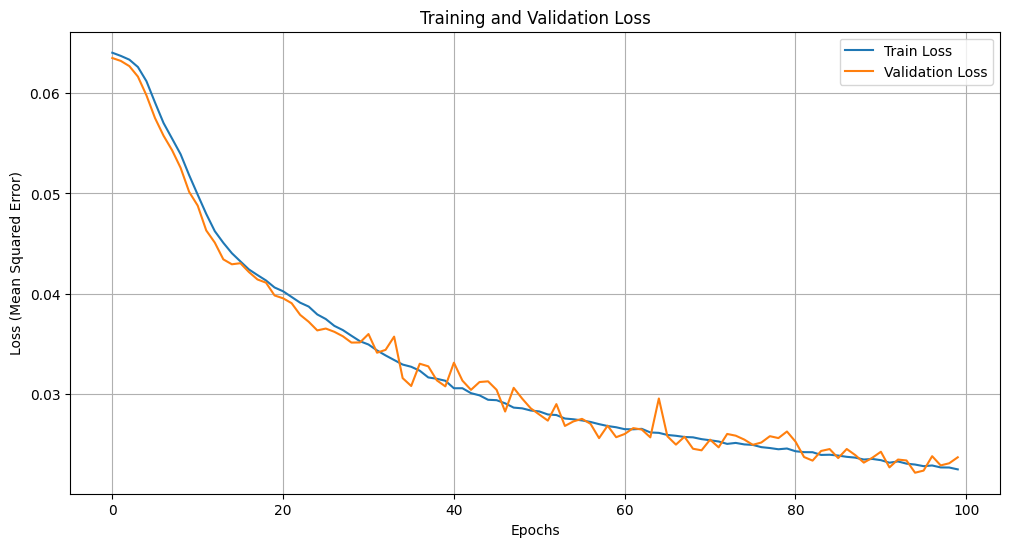

313/313 - 2s - 6ms/step - loss: 0.0237


0.02367192506790161

In [5]:
# 4. Skomentować przebieg procesu uczenia na podstawie metryk na zbiorze uczącym i testowym w kolejnych epokach uczenia (można zwizualizować). Czy nastąpił overfitting / underfitting ?

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

autoencoder.evaluate(test_images_normalized, test_images_normalized, verbose=2)

# Wnioski:

# Krzywa uczenia się maleje wraz z kolejnymi epokami:
# - Mocny spadek przy pierwszych 20 epokach
# - Średni spadek jest między 20 a 60 epoką
# - Słaby spadek po 60 epoce

# Krzywa walidacyjna oscyluje wokół krzywej uczenia
# Miejscami ma większą wartość niż krzywa uczenia, istnieje niewielkie ryzyko przeuczenia

# Funkcja staty po ostatniej epoce zwraca wartość 0.0237, co jest względnie dobrym wynikiem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


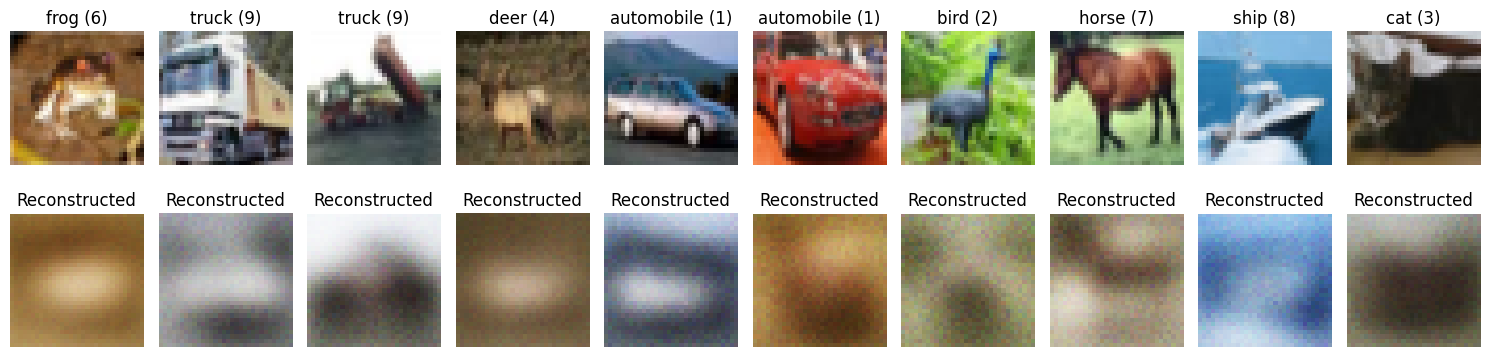

In [6]:
# 5. Zwizualizować 10-25 przykładów obraz wejściowy - rekonstrukcja

images_to_compare = 10

reconstructed_images = autoencoder.predict(train_images_normalized[:images_to_compare])

fig, axes = plt.subplots(2, images_to_compare, figsize=(15, 4))
axes = axes.ravel()

for i in range(images_to_compare):
    axes[i].imshow(train_images[i])
    axes[i].axis('off')
    axes[i].set_title(f"{ordered_labels[train_labels[i][0]]} ({train_labels[i][0]})")

    axes[i + images_to_compare].imshow(reconstructed_images[i])
    axes[i + images_to_compare].axis('off')
    axes[i + images_to_compare].set_title(f"Reconstructed")

plt.tight_layout()
plt.show()

Rekonstrukcja

In [7]:
# 6. Zbudować prosty klasyfikator wykorzystujący:
# - warstwę enkodującą do transformacji wejścia do wektora o rozmiarze 512 (ta warstwa nie będzie zmieniana podczas uczenia)
# - dwie warstwy gęste: ostatnia z funkcją aktywacji softmax
# - optimizer SGD, funkcja straty: CategoricalCrossentropy

# Przygotowanie etykiet w formacie one-hot encoding
num_classes = 10
train_labels_one_hot = utils.to_categorical(train_labels, num_classes=num_classes)
test_labels_one_hot = utils.to_categorical(test_labels, num_classes=num_classes)
encoder.trainable = False

# Zakodowanie danych wejściowych przy użyciu warstwy enkodującej
# encoder_model = models.Model(inputs=autoencoder.input, outputs=encoder.output)
# train_encoded = encoder_model.predict(train_images_normalized)
# test_encoded = encoder_model.predict(test_images_normalized)

# Model klasyfikatora
classifier = models.Sequential([
    encoder,
    # layers.InputLayer(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Kompilacja modelu
classifier.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Trenowanie modelu klasyfikatora
history_classifier = classifier.fit(
    train_images_normalized,
    train_labels_one_hot,
    epochs=50,
    batch_size=1024,
    validation_data=(test_images_normalized, test_labels_one_hot),
    verbose=2
)

Epoch 1/50
49/49 - 4s - 82ms/step - accuracy: 0.2038 - loss: 2.1775 - val_accuracy: 0.2609 - val_loss: 2.0548
Epoch 2/50
49/49 - 2s - 46ms/step - accuracy: 0.2920 - loss: 2.0077 - val_accuracy: 0.3118 - val_loss: 1.9648
Epoch 3/50
49/49 - 1s - 13ms/step - accuracy: 0.3181 - loss: 1.9450 - val_accuracy: 0.3243 - val_loss: 1.9216
Epoch 4/50
49/49 - 1s - 13ms/step - accuracy: 0.3309 - loss: 1.9115 - val_accuracy: 0.3338 - val_loss: 1.8960
Epoch 5/50
49/49 - 1s - 26ms/step - accuracy: 0.3393 - loss: 1.8897 - val_accuracy: 0.3409 - val_loss: 1.8784
Epoch 6/50
49/49 - 1s - 26ms/step - accuracy: 0.3447 - loss: 1.8744 - val_accuracy: 0.3448 - val_loss: 1.8656
Epoch 7/50
49/49 - 1s - 25ms/step - accuracy: 0.3499 - loss: 1.8625 - val_accuracy: 0.3482 - val_loss: 1.8548
Epoch 8/50
49/49 - 1s - 25ms/step - accuracy: 0.3513 - loss: 1.8527 - val_accuracy: 0.3514 - val_loss: 1.8454
Epoch 9/50
49/49 - 1s - 26ms/step - accuracy: 0.3559 - loss: 1.8441 - val_accuracy: 0.3580 - val_loss: 1.8378
Epoch 10/5

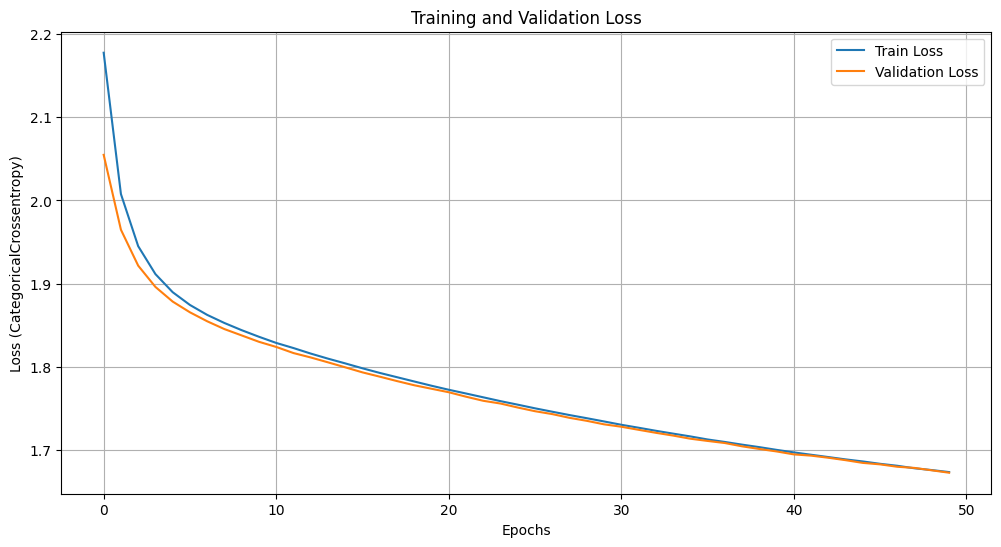

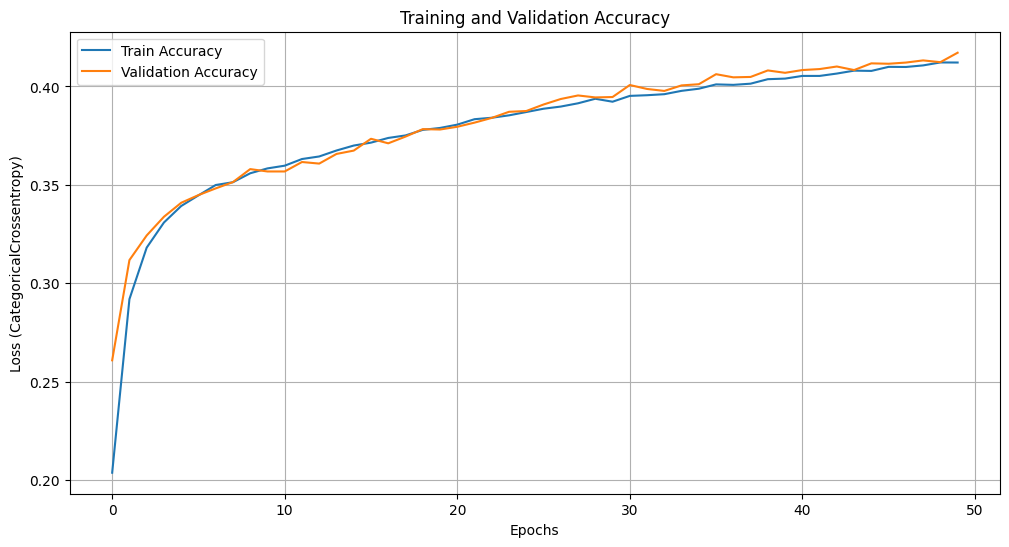

313/313 - 1s - 4ms/step - accuracy: 0.4171 - loss: 1.6728


[1.672823429107666, 0.4171000123023987]

In [8]:
# 7. Zbadać metrykę accuracy na zbiorze testowym (ile obrazów zostało poprawnie zaklasyfikowanych)

plt.figure(figsize=(12, 6))

plt.plot(history_classifier.history['loss'], label='Train Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
# plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
# plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (CategoricalCrossentropy)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

# plt.plot(history_classifier.history['loss'], label='Train Loss')
# plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.plot(history_classifier.history['accuracy'], label='Train Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss (CategoricalCrossentropy)')
plt.legend()
plt.grid(True)
plt.show()

classifier.evaluate(test_images_normalized, test_labels_one_hot, verbose=2)

# Wnioski:

# Krzywa uczenia się maleje wraz z kolejnymi epokami:
# - Mocny spadek przy pierwszych kilku epokach
# - Średni spadek w pozostałych epokach

# Krzywa walidacyjna znajduje się pod krzywą uczenia
# Nie widać znaków przeuczenia

# Dokładność dla danych treningowych rośnie wraz z kolejnymi epokami
# - Duży wzrost przy pierwszych kilku epokach
# - Średni wzrosty w pozostałych epokach

# Dokładnośc dla danych testowych nieznacznie przekracza dokładność dla danych treningowych
# Istnieje ryzyko przeuczenia

# Dokładność wyniosła 0.4171, co jest dobrym wynikiem